In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
from keras.layers import Dense
from keras.layers import Dropout
from keras.models import Sequential
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_regression

### Copied to have insights of plots having overfittingg and then use of dropout

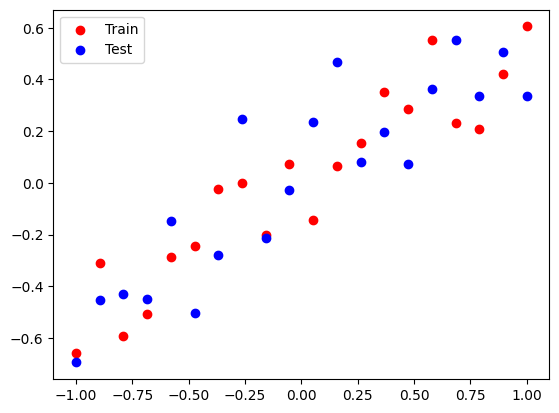

Train: 0.004485652782022953, Test: 0.04623982682824135
1/1 [==============================] - 0s 59ms/step


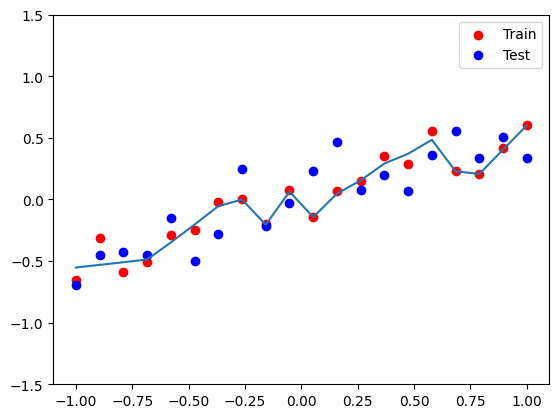

Train: 0.012256418354809284, Test: 0.040101177990436554
1/1 [==============================] - 0s 59ms/step


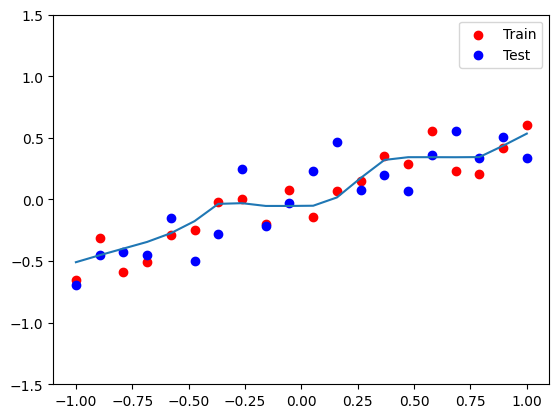

In [50]:
X_train = np.linspace(-1, 1, 20)

y_train = np.array([-0.6561 , -0.3099 , -0.59035, -0.50855, -0.285  , 
                    -0.2443 , -0.02445,  0.00135, -0.2006 ,  0.07475, 
                    -0.1422 ,  0.06515,  0.15265,  0.3521 ,  0.28415,  
                    0.5524 ,  0.23115,  0.20835, 0.4211,  0.60485])

X_test = np.linspace(-1, 1, 20)

y_test = np.array([-0.69415, -0.451  , -0.43005, -0.4484 , -0.1475 ,
                   -0.5019 , -0.28055,  0.24595, -0.21425, -0.0286 ,  
                   0.23415,  0.46575, 0.07955,  0.1973 ,  0.0719 ,
                   0.3639 ,  0.5536 ,  0.3365 , 0.50705,  0.33435])

plt.scatter(X_train, y_train, c='red', label='Train')
plt.scatter(X_test, y_test, c='blue', label='Test')
plt.legend()
plt.show()

# Regression Model

model_1 = Sequential()
model_1.add(Dense(128, input_dim=1, activation="relu"))
model_1.add(Dense(128, activation="relu"))
model_1.add(Dense(1, activation="linear"))
adam = Adam(learning_rate=0.01)
model_1.compile(loss='mse', optimizer=adam, metrics=['mse'])
history = model_1.fit(X_train, y_train, epochs=500, 
                    validation_data = (X_test, y_test),
                    verbose=False)

# evaluate the model
_, train_mse = model_1.evaluate(X_train, y_train, verbose=0)
_, test_mse = model_1.evaluate(X_test, y_test, verbose=0)
print('Train: {}, Test: {}'.format(train_mse, test_mse))

y_pred_1 = model_1.predict(X_test)

plt.figure()
plt.scatter(X_train, y_train, c='red', label='Train')
plt.scatter(X_test, y_test, c='blue', label='Test')
plt.plot(X_test, y_pred_1)
plt.legend()
plt.ylim((-1.5, 1.5))
plt.show()

# Dropout Model

model_2 = Sequential()
model_2.add(Dense(128, input_dim=1, activation="relu"))
model_2.add(Dropout(0.2))
model_2.add(Dense(128, activation="relu"))
model_2.add(Dropout(0.2))
model_2.add(Dense(1, activation="linear"))
adam = Adam(learning_rate=0.01)
model_2.compile(loss='mse', optimizer=adam, metrics=['mse'])

drop_out_history = model_2.fit(X_train, y_train, epochs=500, 
                               validation_data = (X_test, y_test),
                               verbose=False)

# evaluate the model
_, train_mse = model_2.evaluate(X_train, y_train, verbose=0)
_, test_mse = model_2.evaluate(X_test, y_test, verbose=0)
print('Train: {}, Test: {}'.format(train_mse, test_mse))

y_pred_2 = model_2.predict(X_test)

plt.figure()
plt.scatter(X_train, y_train, c='red', label='Train')
plt.scatter(X_test, y_test, c='blue', label='Test')
plt.plot(X_test, y_pred_2)
plt.legend()
plt.ylim((-1.5, 1.5))
plt.show()



### Good Data


In [26]:

np.random.seed(42)
X = np.random.rand(50)  
y = 0.5 * X + 1 + np.random.normal(0, 0.1, 50)  

data = {
    'Feature': X,
    'Target': y
}

df = pd.DataFrame(data)


print(df)


     Feature    Target
0   0.374540  1.261117
1   0.950714  1.492494
2   0.731994  1.354432
3   0.598658  1.269219
4   0.156019  0.930157
5   0.155995  1.006013
6   0.058084  0.982978
7   0.866176  1.538800
8   0.601115  1.334919
9   0.708073  1.177732
10  0.020584  1.042701
11  0.969910  1.446447
12  0.832443  1.348529
13  0.212339  1.167337
14  0.181825  1.194012
15  0.183405  1.184830
16  0.304242  1.068199
17  0.524756  1.231457
18  0.431945  1.249099
19  0.291229  1.243169
20  0.611853  1.258009
21  0.139494  1.051181
22  0.292145  1.035439
23  0.366362  1.063560
24  0.456070  1.309288
25  0.785176  1.528212
26  0.199674  1.092636
27  0.514234  1.357471
28  0.592415  1.332371
29  0.046450  0.958713
30  0.607545  1.339912
31  0.170524  1.239066
32  0.065052  1.028943
33  0.948886  1.630907
34  0.965632  1.220842
35  0.808397  1.486389
36  0.304614  1.161012
37  0.097672  1.018935
38  0.684233  1.351293
39  0.440152  1.021319
40  0.122038  1.039052
41  0.495177  1.283300
42  0.03438

In [29]:
trainx,testx,trainy,testy = train_test_split(df["Feature"],df["Target"],test_size=0.5, random_state=41)

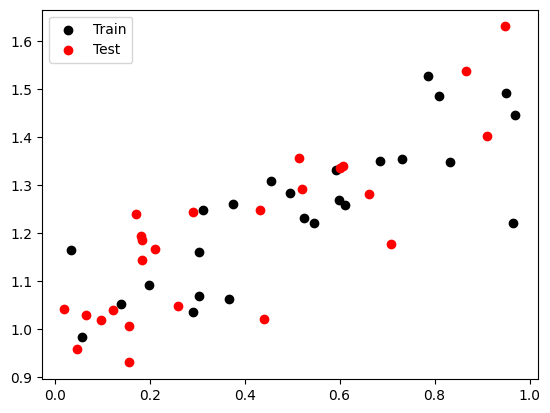

In [30]:
plt.scatter(trainx, trainy,c = 'black', label = 'Train')
plt.scatter(testx, testy, c = 'red', label = 'Test')
plt.legend()
plt.show()

In [31]:
model = Sequential()
model.add(Dense(4, activation='relu', input_dim = 1))
model.add(Dense(2,activation='relu'))
model.add(Dense(1, activation='linear'))

In [32]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 4)                 8         
                                                                 
 dense_1 (Dense)             (None, 2)                 10        
                                                                 
 dense_2 (Dense)             (None, 1)                 3         
                                                                 
Total params: 21 (84.00 Byte)
Trainable params: 21 (84.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [45]:
from keras.optimizers import Adam
adam = Adam(learning_rate = 0.01)
model.compile(loss='mse',optimizer='adam',metrics=['accuracy'])

In [46]:
history = model.fit(trainx,trainy, epochs=500 ,validation_data=(trainx, trainy))

Epoch 1/500
1/1 [==============================] - 1s 1s/step - loss: 0.0088 - accuracy: 0.0000e+00 - val_loss: 0.0086 - val_accuracy: 0.0000e+00
Epoch 2/500
1/1 [==============================] - 0s 80ms/step - loss: 0.0086 - accuracy: 0.0000e+00 - val_loss: 0.0084 - val_accuracy: 0.0000e+00
Epoch 3/500
1/1 [==============================] - 0s 64ms/step - loss: 0.0084 - accuracy: 0.0000e+00 - val_loss: 0.0082 - val_accuracy: 0.0000e+00
Epoch 4/500
1/1 [==============================] - 0s 49ms/step - loss: 0.0082 - accuracy: 0.0000e+00 - val_loss: 0.0081 - val_accuracy: 0.0000e+00
Epoch 5/500
1/1 [==============================] - 0s 48ms/step - loss: 0.0081 - accuracy: 0.0000e+00 - val_loss: 0.0080 - val_accuracy: 0.0000e+00
Epoch 6/500
1/1 [==============================] - 0s 46ms/step - loss: 0.0080 - accuracy: 0.0000e+00 - val_loss: 0.0079 - val_accuracy: 0.0000e+00
Epoch 7/500
1/1 [==============================] - 0s 50ms/step - loss: 0.0079 - accuracy: 0.0000e+00 - val_loss: 

In [47]:
y_pred = model.predict(testx)

1/1 [==============================] - 0s 58ms/step


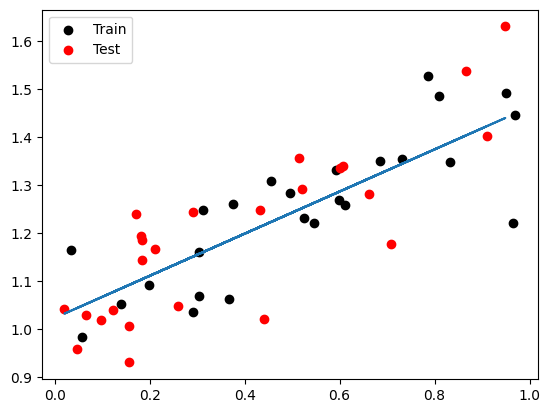

In [48]:
plt.scatter(trainx, trainy,c = 'black', label = 'Train')
plt.scatter(testx, testy, c = 'red', label = 'Test')
plt.plot(testx,y_pred)
plt.legend()
plt.show()